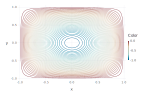

In [6]:
using Gadfly
p(x,y) = -cos(0.5*pi*x)*cos(0.5*pi*y);
plot(z=p, x=linspace(-1,1,200), y=linspace(-1,1,200), Geom.contour(levels=40))
# function for homogeneous Dirichlet boundary conditions

In [12]:
using SymPy
x = sympy.Symbol("x", real=true);
y = sympy.Symbol("y", real=true);
spi = sympy.Symbol("\pi", real=true);
a = sqrt(2)*pi/3;
um = cos(a*(x-y-pi/3));
up = cos(a*(x+y+pi/3));
ex = [um + up, um - up];
sex = Sym[simplify(e) for e in ex]
#ex = cos(0.5*spi*x)*cos(0.5*spi*y)
display(Sym(diff(ex[1],x) + diff(ex[2],y)));

grad_p = [diff(p(x,y),x), diff(p(x,y),y)];
div_grad_p = diff(grad_p[1], x) + diff(grad_p[2], y);
integrate(integrate(div_grad_p, (x,-1.0,1.0)), (y,-1.0,1.0))

0

8.00000000000000

INFO: Recompiling stale cache file /Users/egor/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /Users/egor/.julia/lib/v0.4/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /Users/egor/.julia/lib/v0.4/LaTeXStrings.ji for module LaTeXStrings.
/Users/egor/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


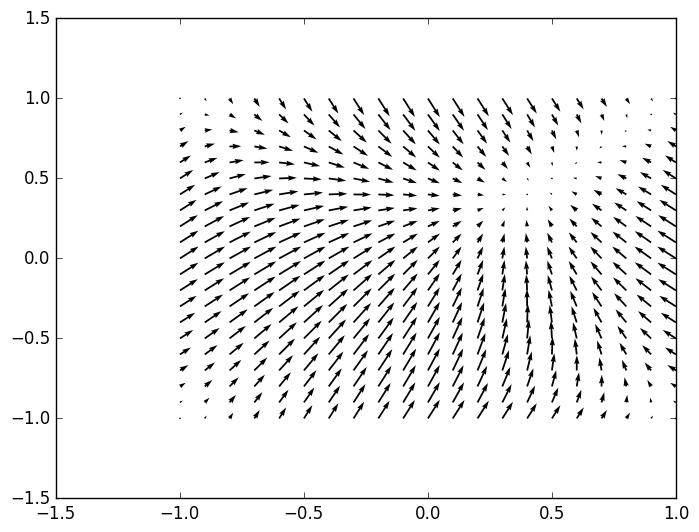

PyObject <matplotlib.quiver.Quiver object at 0x31b37fa90>

In [1]:
using PyPlot
PyPlot.svg(true);
meshgrid(v::AbstractVector) = meshgrid(v, v)
function meshgrid{T}(vx::AbstractVector{T}, vy::AbstractVector{T})
    m, n = length(vy), length(vx)
    vx = reshape(vx, 1, n)
    vy = reshape(vy, m, 1)
    (repmat(vx, m, 1), repmat(vy, 1, n))
end

X,Y = meshgrid( -1:.1:1, -1:.1:1);
U = cos(0.5*pi*X) - 0.5*pi*sin(0.5*pi*X).*cos(0.5*pi*Y);
V = cos(0.5*pi*Y) - 0.5*pi*sin(0.5*pi*Y).*cos(0.5*pi*X);
# Input velocity field
Q = quiver(X, Y, U, V)

1-element Array{Int64,1}:
 0

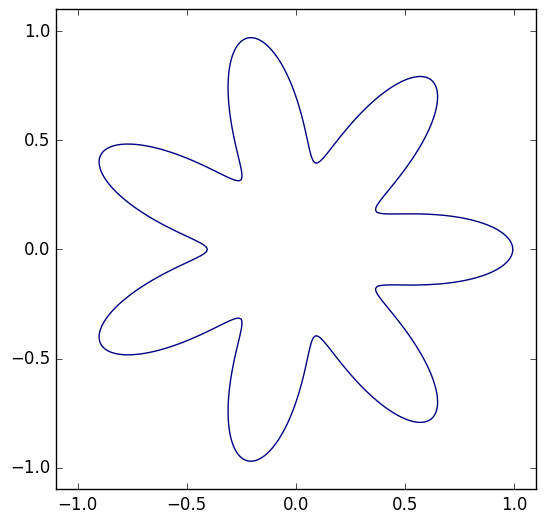

In [15]:
X,Y = meshgrid( -1:.01:1, -1:.01:1);
ax1 = subplot(1, 1, 1, aspect=1)
axis([-1.1, 1.1, -1.1, 1.1]);
levels = [0];
display(levels);
arms = 7;
avg_rad = 0.7;
scale = 0.42;
Z = X.^2 + Y.^2 - (avg_rad - scale*avg_rad*(sin(arms*atan2(X,Y)))).^2;
CS = contour(X,Y,Z,levels);
savefig("flower.pdf")

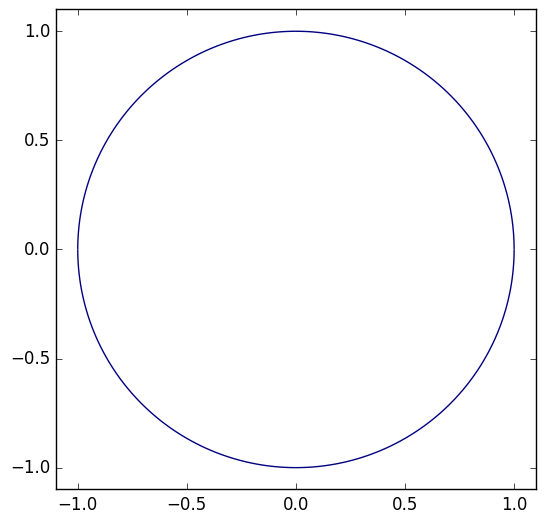

In [16]:
ax1 = subplot(1, 1, 1, aspect=1)
axis([-1.1, 1.1, -1.1, 1.1]);
levels = [0];
avg_rad = 1;
Z = X.^2 + Y.^2 - avg_rad;
CS = contour(X,Y,Z,levels);
savefig("circle.pdf")

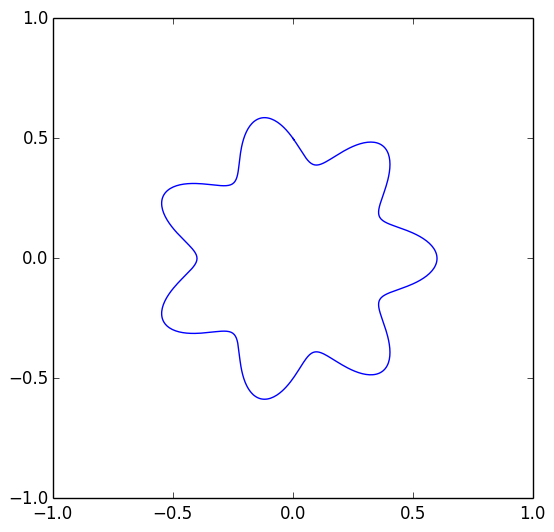

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11d1bf410>

In [91]:
ax1 = subplot(1, 1, 1, aspect=1)
axis([-1, 1, -1, 1]);
step = 0.01;
x = collect(0:step:2pi+step);
r = 0.5;
plot(r*(1 .- scale.*sin(7.*x)).*sin(x),r*(1 .- scale.*sin(7.*x)).*cos(x))

(21,21)

(21,21)

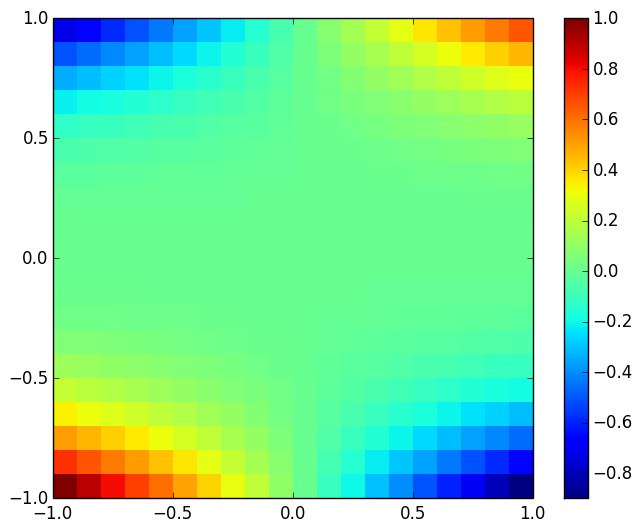

PyObject <matplotlib.colorbar.Colorbar instance at 0x11da79bd8>

In [20]:
f(x,y) = x*y*y*y;
#C = 
#for idx = CartesianRange(size())
display(size(X))
display(size(C))

#fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(1, 1, 1, aspect=1)
pcolor(X, Y, C)
colorbar()

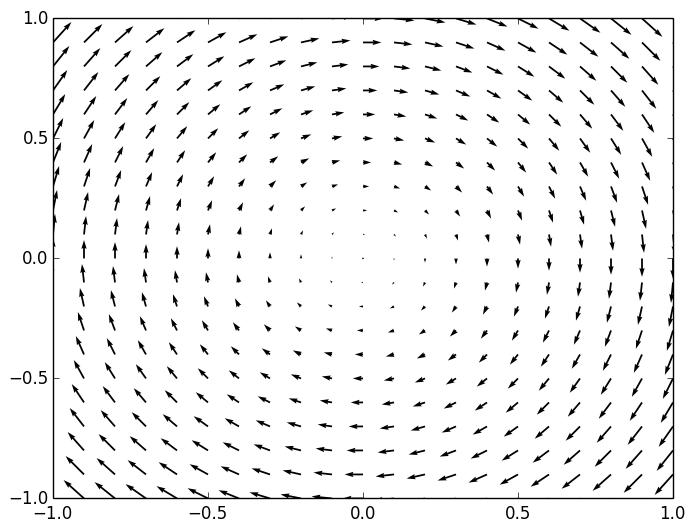

PyObject <matplotlib.quiver.Quiver object at 0x11b9a3d90>

In [2]:
U = Y;
V = -X;
Q = quiver(X, Y, U, V)

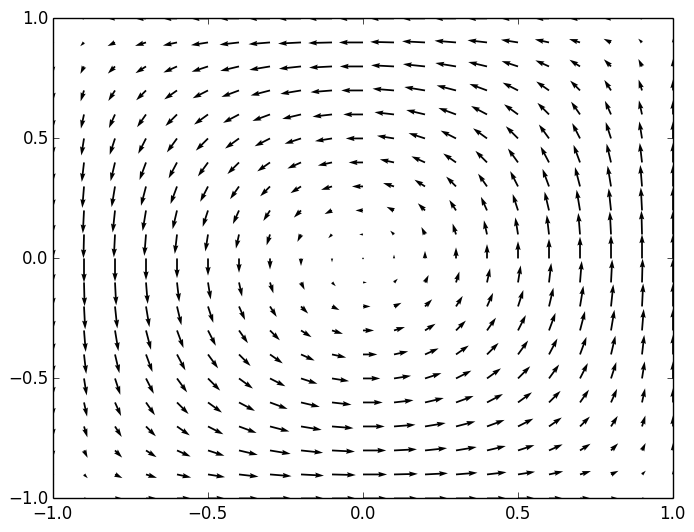

PyObject <matplotlib.quiver.Quiver object at 0x1169ec510>

In [20]:
X,Y = meshgrid( -1:.1:1, -1:.1:1);
sqinv = 1/sqrt(2);
a = pi/2;
U = sqinv*(cos(a*(X - Y) - pi/2) + cos(a*(X+Y)+pi/2));
V = sqinv*(cos(a*(X - Y) - pi/2) - cos(a*(X+Y)+pi/2));
 # Output given pressure
Q = quiver(X, Y, U, V)

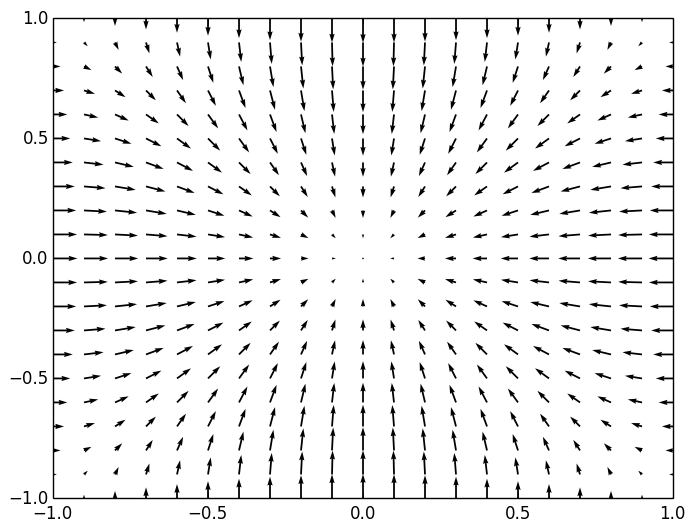

PyObject <matplotlib.quiver.Quiver object at 0x12183c610>

In [144]:
U2 = - 0.5*pi*sin(0.5*pi*X).*cos(0.5*pi*Y)
V2 = - 0.5*pi*sin(0.5*pi*Y).*cos(0.5*pi*X);
Q = quiver(X, Y, U2, V2)

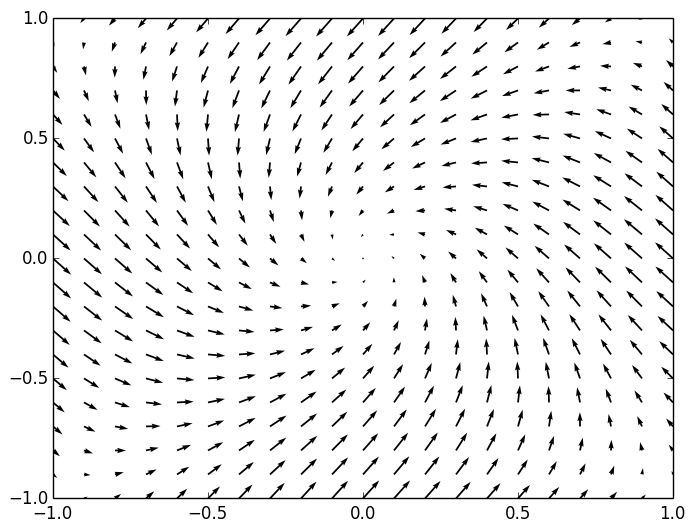

PyObject <matplotlib.quiver.Quiver object at 0x121d60810>

In [146]:
U3 = U + U2;
V3 = V + V2;
Q = quiver(X, Y, U3, V3)